In [1]:
import numpy as np
from nbodykit.source.catalog import Gadget1Catalog
from matplotlib import pyplot as plt

In [2]:
def Gadget2BigFile(fname):
    cat = Gadget1Catalog(fname, ptype=1, 
                         columndefs=[('Position', ('auto', 3), 'all'), 
                                     ('GadgetVelocity', ('auto', 3), 'all'), 
                                     ('ID', 'auto', 'all')])

    attrs = cat.attrs.copy()
    cat.attrs.clear()

    cat.attrs['MassTable'] = attrs['Massarr']
    cat.attrs['TotNumPart'] = np.int64(attrs['Nall']) + (np.int64(attrs['NallHW']) << 32)
    cat.attrs['TotNumPartInit'] = np.int64(attrs['Nall']) + (np.int64(attrs['NallHW']) << 32)
    cat.attrs['BoxSize'] = attrs['BoxSize']*np.ones(3)/1000. # for FOF finder
    cat.attrs['Time'] = attrs['Time']
    cat.attrs['ScalingFactor'] = attrs['Time']

    cat.attrs['TimeIC'] = attrs['Time']

    cat.attrs['UnitVelocity_in_cm_per_s'] = 1e5

    cat.attrs['UnitLength_in_cm'] = 3.085678e24

    cat.attrs['UnitMass_in_g'] = 1.989e43

    # The velocity convention is weird without this
    cat.attrs['UsePeculiarVelocity'] = True

    a = attrs['Time']
    cat['Position'] = cat['Position']/1e3
    cat['Velocity'] = cat['GadgetVelocity'] * a ** 0.5

    return cat

In [3]:
dm_ic = Gadget2BigFile("/mnt/d/Simu/lcdm/0/IC/LCDM_512_400")

In [5]:
dm_field = dm_ic.to_mesh(Nmesh=512, BoxSize=400.)

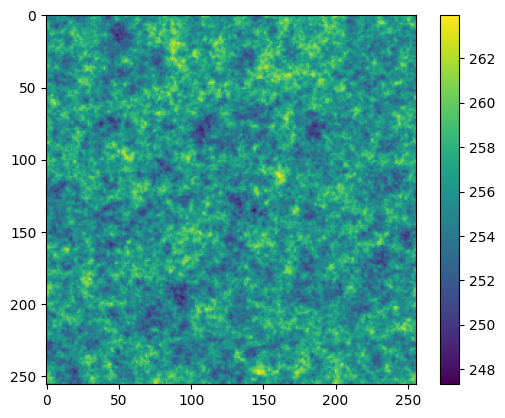

In [23]:
plt.imshow(dm_field.preview(Nmesh=256, axes=[0,1]))
plt.colorbar()

In [6]:
dm_field.save("Nbody_IC_512/", dataset='LinearDensityK', mode='complex')

In [18]:
import readgadget
import MAS_library as MASL

In [20]:
dm_ic_true = readgadget.read_block("/mnt/d/Simu/lcdm/0/IC/LCDM_512_400", "POS ", ptype=[1])/1e3

In [29]:
delta = np.zeros((256,256,256), dtype=np.float32)
BoxSize = 400.
MAS = 'CIC'
MASL.MA(dm_ic_true, delta, BoxSize, MAS)

In [30]:
delta /= np.mean(delta)

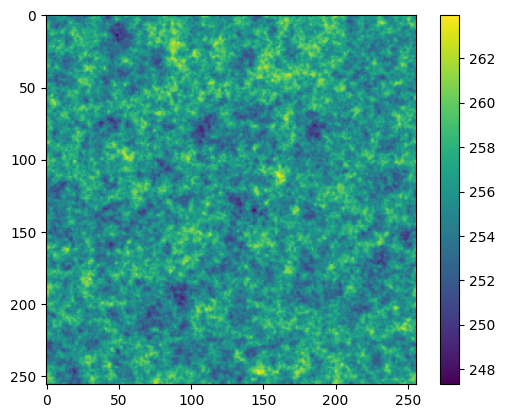

In [32]:
plt.imshow(np.sum(delta, axis=-1))
plt.colorbar()

In [34]:
from nbodykit.source.catalog import BigFileCatalog

In [55]:
dm_fpm_nbdic = BigFileCatalog("catalog/test/a_0.7692/", dataset="1/", header="Header")

/home/suqikuai777/.local/lib/python3.10/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


In [56]:
np.max(dm_fpm_nbdic['Position']).compute()

400.0

In [57]:
mesh = dm_fpm_nbdic.to_mesh(Nmesh=256, BoxSize=400)

In [58]:
from nbodykit.algorithms.fftpower import FFTPower

In [59]:
result = FFTPower(mesh, mode='1d')

In [60]:
Pk_fpm_nbdic = result.power

In [49]:
result = FFTPower(dm_field, mode='1d')
Pk_ic = result.power

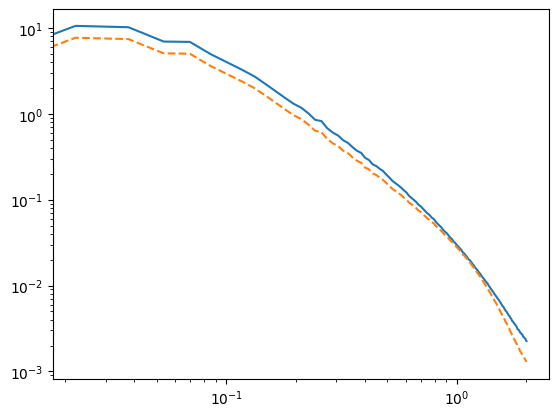

In [51]:
plt.loglog(Pk_ic['k'], Pk_ic['power'].real)
plt.loglog(Pk_fpm_nbdic['k'], Pk_fpm_nbdic['power'].real, '--')

### load GADGET catalog

In [63]:
dm_cat = Gadget2BigFile("/mnt/d/Simu/lcdm/0/result/snapshot_011")

In [64]:
np.max(np.array(dm_cat['Position']))

399.99997

In [65]:
dm_nbd = dm_cat.to_mesh(Nmesh=256, BoxSize=400.)

In [66]:
result = FFTPower(dm_nbd, mode='1d')

In [67]:
Pk_nbd = result.power

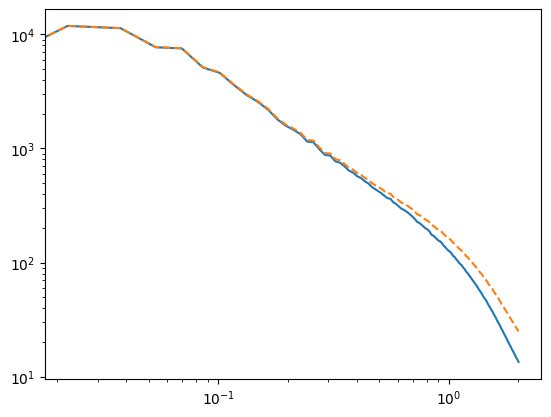

In [69]:
plt.loglog(Pk_fpm_nbdic['k'], Pk_fpm_nbdic['power'].real)
plt.loglog(Pk_nbd['k'], Pk_nbd['power'].real, '--')